In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
info_df_raw = pd.read_csv("/content/drive/My Drive/데이터분석/samsung/info1.csv")
feat_df_raw = pd.read_csv("/content/drive/My Drive/데이터분석/samsung/samp_cst_feat.csv")
train_df_raw = pd.read_csv("/content/drive/My Drive/데이터분석/samsung/samp_train.csv")
dtype_df_raw = pd.read_excel("/content/drive/My Drive/데이터분석/samsung/variable_dtype.xlsx")

In [5]:
info_df = info_df_raw.copy()
feat_df = feat_df_raw.copy()
train_df = train_df_raw.copy()

In [6]:
info_df_raw #가맹점은 다 다른데 카테고리가 겹치는 애들은 더 가중치 줄 필요 있을듯

,MRC_ID_DI,Category
0,0,미이용
1,1,홈쇼핑
2,2,종합물
3,3,종합몰
4,4,전문몰
5,5,종합몰
6,6,홈쇼핑
7,7,오픈마켓_소셜
8,8,홈쇼핑
9,9,전문몰


In [7]:
feat_df_raw.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,-0.04432,-0.28743,-0.01164,0.26300,-0.15466,-0.08374,-0.12935,-0.24726,-0.32134,0.39311,-0.32813,0.35632,0.12739,1,-0.18338,-0.07717,0.4688,0.18707,-0.03818,-0.04869,1,1,-0.14361,0.20281,0,0,0.02536,-0.20705,0.03747,0.28517,-0.18100,0,0,-0.20069,0.23156,-0.18709,0.20059,0.04329,0.0025,0.13105,-0.00891,0.23236,0.10216,0.28202,0.0077,-0.09886,0.29902,-0.22713,0,-0.23064,0,0,0,0.06628,0.11613,0.0093,0.03583,0.3578,0.20585,1.0000,-0.29631,0,0.0008,0.26873,0.05674,0,0.02082,0.26616,-0.25601,0.16075,0.15089,0.7286,0.07524,-0.11761,-0.13649,0.16103,0.38476,0.18881,0,0.00524,0.29896,1,0.36885,0.05585,0.06960,0.0068,0.05439,-0.04895,0.22997,0.06607,-0.02500,-0.05500,0.0020,0.07158,-0.11915,-0.09522,0.11580,1,0,0,0.35606,-0.32429,0,0.19451,-0.22885,0.01926,-0.15068,0.13834,-0.16525,0.09025,0.01253,0.20219,0.31263,-0.17855,-0.20515,-0.18453,-0.21851,0.37549,-0.10744,0,0.13043,0.0013,-0.17485,0.18986,-0.07305,0.0069,-0.30157,-0.16382,0.28385,-0.14273,-0.27069,0,0.3766,0,0.06165,0.0021,-0.03891,0.04840,-0.14790,0.26533,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,0.5369,0.23387,0.04572,0.05406,-0.18782,-0.23752,-0.10148,-0.16942,0.02893,0.03702,0.04855,0.36531,0.24302,-0.30677,-0.20810,-0.12376,0.15054,0,0.22430,0.10513,0.3797,-0.16796,0.01456,-0.10743,0,1,-0.08246,-0.38202,0,0,0.02066,0.28113,0.05687,-0.11689,0.16837,1,1,-0.08043,0.21618,-0.20256,0.23597,0.06233,0.3285,0.05898,0.00544,-0.29231,0.02483,-0.38122,0.0065,0.39975,0.09775,-0.34015

In [8]:
feat_df_raw.dtypes.head(10) #dtypes 엑셀파일 이용해서 카테고리컬 변수 변환

cst_id_di      int64
VAR002       float64
VAR003       float64
VAR004       float64
VAR005       float64
VAR006       float64
VAR007         int64
VAR008       float64
VAR009       float64
VAR010       float64
dtype: object

In [9]:
train_df_raw.head()

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6


In [10]:
dtype_dict = dtype_df_raw.set_index('Variable_Name')['dType'].to_dict()

In [11]:
#카테고리컬 변수타입 변환
for w in feat_df_raw.columns:
  if w in dtype_dict.keys():
    if dtype_dict[w] == "categorical":
      feat_df[w] = feat_df_raw[w].astype(str)
feat_df.dtypes.head(10)

cst_id_di      int64
VAR002       float64
VAR003       float64
VAR004       float64
VAR005       float64
VAR006       float64
VAR007        object
VAR008       float64
VAR009       float64
VAR010       float64
dtype: object

In [12]:
#카테고리컬 변수들 행 이름
obj_col = []
numerical_col = [] 
for w in dtype_dict:
  if dtype_dict[w] == "categorical":
    obj_col.append(w)
  else:
    numerical_col.append(w)

In [13]:
##categorical은 다 dummy variables
for i in obj_col:
  print(feat_df[i].value_counts())
  print()

0    8633
1    1491
Name: VAR007, dtype: int64

0    5430
1    4694
Name: VAR015, dtype: int64

0    8009
1    2115
Name: VAR018, dtype: int64

0    9926
1     198
Name: VAR026, dtype: int64

0    7606
1    2518
Name: VAR059, dtype: int64

0    7324
1    2800
Name: VAR066, dtype: int64

1    8723
0    1401
Name: VAR067, dtype: int64

0    8166
1    1958
Name: VAR070, dtype: int64

0    9314
1     810
Name: VAR071, dtype: int64

0    8769
1    1355
Name: VAR077, dtype: int64

0    9738
1     386
Name: VAR078, dtype: int64

0    9515
1     609
Name: VAR094, dtype: int64

0    9158
1     966
Name: VAR096, dtype: int64

0    8956
1    1168
Name: VAR097, dtype: int64

0    9306
1     818
Name: VAR098, dtype: int64

0    8434
1    1690
Name: VAR107, dtype: int64

0    7949
1    2175
Name: VAR111, dtype: int64

0    7452
1    2672
Name: VAR124, dtype: int64

0    7249
1    2875
Name: VAR127, dtype: int64

0    9952
1     172
Name: VAR143, dtype: int64

0    9485
1     639
Name: VAR144, dtype:

In [14]:
train_df.head(10)

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6
5,90000000263,0
6,90000000322,0
7,90000000354,0
8,90000000407,0
9,90000000408,0


In [15]:
train_df.groupby("MRC_ID_DI").sum()

,cst_id_di
MRC_ID_DI,
0,738001873446410
1,7650019500654
2,1260003033581
3,2880007977965
4,990003299072
5,12870030883335
6,49860128414992
7,59490150776353
8,30330077164853


In [16]:
#독립변수들 이름
var_list = feat_df.columns[1:]
var_str = "+".join(var_list)
var_str

'VAR002+VAR003+VAR004+VAR005+VAR006+VAR007+VAR008+VAR009+VAR010+VAR011+VAR012+VAR013+VAR014+VAR015+VAR016+VAR017+VAR018+VAR019+VAR020+VAR021+VAR022+VAR023+VAR024+VAR025+VAR026+VAR027+VAR028+VAR029+VAR030+VAR031+VAR032+VAR033+VAR034+VAR035+VAR036+VAR037+VAR038+VAR039+VAR040+VAR041+VAR042+VAR043+VAR044+VAR045+VAR046+VAR047+VAR048+VAR049+VAR050+VAR051+VAR052+VAR053+VAR054+VAR055+VAR056+VAR057+VAR058+VAR059+VAR060+VAR061+VAR062+VAR063+VAR064+VAR065+VAR066+VAR067+VAR068+VAR069+VAR070+VAR071+VAR072+VAR073+VAR074+VAR075+VAR076+VAR077+VAR078+VAR079+VAR080+VAR081+VAR082+VAR083+VAR084+VAR085+VAR086+VAR087+VAR088+VAR089+VAR090+VAR091+VAR092+VAR093+VAR094+VAR095+VAR096+VAR097+VAR098+VAR099+VAR100+VAR101+VAR102+VAR103+VAR104+VAR105+VAR106+VAR107+VAR108+VAR109+VAR110+VAR111+VAR112+VAR113+VAR114+VAR115+VAR116+VAR117+VAR118+VAR119+VAR120+VAR121+VAR122+VAR123+VAR124+VAR125+VAR126+VAR127+VAR128+VAR129+VAR130+VAR131+VAR132+VAR133+VAR134+VAR135+VAR136+VAR137+VAR138+VAR139+VAR140+VAR141+VAR142+VAR143+VAR14

In [17]:
combine_df = feat_df.copy()
combine_df['label'] = train_df_raw['MRC_ID_DI']

In [18]:
combine_df.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,-0.04432,-0.28743,-0.01164,0.26300,-0.15466,-0.08374,-0.12935,-0.24726,-0.32134,0.39311,-0.32813,0.35632,0.12739,1,-0.18338,-0.07717,0.4688,0.18707,-0.03818,-0.04869,1,1,-0.14361,0.20281,0,0,0.02536,-0.20705,0.03747,0.28517,-0.18100,0,0,-0.20069,0.23156,-0.18709,0.20059,0.04329,0.0025,0.13105,-0.00891,0.23236,0.10216,0.28202,0.0077,-0.09886,0.29902,-0.22713,0,-0.23064,0,0,0,0.06628,0.11613,0.0093,0.03583,0.3578,0.20585,1.0000,-0.29631,0,0.0008,0.26873,0.05674,0,0.02082,0.26616,-0.25601,0.16075,0.15089,0.7286,0.07524,-0.11761,-0.13649,0.16103,0.38476,0.18881,0,0.00524,0.29896,1,0.36885,0.05585,0.06960,0.0068,0.05439,-0.04895,0.22997,0.06607,-0.02500,-0.05500,0.0020,0.07158,-0.11915,-0.09522,0.11580,1,0,0,0.35606,-0.32429,0,0.19451,-0.22885,0.01926,-0.15068,0.13834,-0.16525,0.09025,0.01253,0.20219,0.31263,-0.17855,-0.20515,-0.18453,-0.21851,0.37549,-0.10744,0,0.13043,0.0013,-0.17485,0.18986,-0.07305,0.0069,-0.30157,-0.16382,0.28385,-0.14273,-0.27069,0,0.3766,0,0.06165,0.0021,-0.03891,0.04840,-0.14790,0.26533,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,0.5369,0.23387,0.04572,0.05406,-0.18782,-0.23752,-0.10148,-0.16942,0.02893,0.03702,0.04855,0.36531,0.24302,-0.30677,-0.20810,-0.12376,0.15054,0,0.22430,0.10513,0.3797,-0.16796,0.01456,-0.10743,0,1,-0.08246,-0.38202,0,0,0.02066,0.28113,0.05687,-0.11689,0.16837,1,1,-0.08043,0.21618,-0.20256,0.23597,0.06233,0.3285,0.05898,0.00544,-0.29231,0.02483,-0.38122,0.0065,0.39975,0.09775,

In [19]:
y, X = dmatrices('label ~ VAR002+VAR003+VAR004+VAR005+VAR006+VAR007+VAR008+VAR009+VAR010+VAR011+VAR012+VAR013+VAR014+VAR015+VAR016+VAR017+VAR018+VAR019+VAR020+VAR021+VAR022+VAR023+VAR024+VAR025+VAR026+VAR027+VAR028+VAR029+VAR030+VAR031+VAR032+VAR033+VAR034+VAR035+VAR036+VAR037+VAR038+VAR039+VAR040+VAR041+VAR042+VAR043+VAR044+VAR045+VAR046+VAR047+VAR048+VAR049+VAR050+VAR051+VAR052+VAR053+VAR054+VAR055+VAR056+VAR057+VAR058+VAR059+VAR060+VAR061+VAR062+VAR063+VAR064+VAR065+VAR066+VAR067+VAR068+VAR069+VAR070+VAR071+VAR072+VAR073+VAR074+VAR075+VAR076+VAR077+VAR078+VAR079+VAR080+VAR081+VAR082+VAR083+VAR084+VAR085+VAR086+VAR087+VAR088+VAR089+VAR090+VAR091+VAR092+VAR093+VAR094+VAR095+VAR096+VAR097+VAR098+VAR099+VAR100+VAR101+VAR102+VAR103+VAR104+VAR105+VAR106+VAR107+VAR108+VAR109+VAR110+VAR111+VAR112+VAR113+VAR114+VAR115+VAR116+VAR117+VAR118+VAR119+VAR120+VAR121+VAR122+VAR123+VAR124+VAR125+VAR126+VAR127+VAR128+VAR129+VAR130+VAR131+VAR132+VAR133+VAR134+VAR135+VAR136+VAR137+VAR138+VAR139+VAR140+VAR141+VAR142+VAR143+VAR144+VAR145+VAR146+VAR147+VAR148+VAR149+VAR150+VAR151+VAR152+VAR153+VAR154+VAR155+VAR156+VAR157+VAR158+VAR159+VAR160+VAR161+VAR162+VAR163+VAR164+VAR165+VAR166+VAR167+VAR168+VAR169+VAR170+VAR171+VAR172+VAR173+VAR174+VAR175+VAR176+VAR177+var178+VAR179+VAR180+VAR181+VAR182+VAR183+VAR184+VAR185+VAR186+VAR187+VAR188+VAR189+VAR190+VAR191+VAR192+VAR193+VAR194+VAR195+VAR196+VAR197+VAR198+VAR199+VAR200+VAR201+VAR202+VAR203+VAR204+VAR205+VAR206+VAR207+VAR208+VAR209+VAR210+VAR211+VAR212+VAR213+VAR214+VAR215+VAR216+VAR217+VAR218+VAR219+VAR220+VAR221+VAR222+VAR223+VAR224+VAR225+VAR226+VAR227', combine_df, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif =vif.sort_values("VIF Factor",ascending=False)
vif["VIF Factor"] = vif["VIF Factor"].round()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [44]:
vif =vif.sort_values("features")
vif = vif.drop(index=0)

In [48]:
vif[vif["VIF Factor"] == 1]

,VIF Factor,features
34,1.0,VAR008
4,1.0,VAR026[T.1]
7,1.0,VAR067[T.1]
21,1.0,VAR144[T.1]


In [21]:
low_vif = list(vif[vif["VIF Factor"]!="inf"]["features"])
del low_vif[-1]

low_vif_columns = []
for i in low_vif:
  low_vif_columns.append(i[0:6])
low_vif_columns

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


['VAR111',
 'VAR107',
 'VAR018',
 'VAR059',
 'VAR199',
 'VAR179',
 'VAR127',
 'VAR124',
 'VAR097',
 'VAR007',
 'VAR216',
 'VAR119',
 'VAR123',
 'VAR060',
 'VAR176',
 'VAR160',
 'VAR052',
 'VAR203',
 'VAR114',
 'VAR076',
 'VAR095',
 'VAR014',
 'VAR204',
 'VAR012',
 'VAR186',
 'VAR168',
 'VAR039',
 'VAR091',
 'VAR032',
 'VAR139',
 'VAR164',
 'VAR089',
 'VAR137',
 'VAR150',
 'VAR202',
 'VAR011',
 'VAR116',
 'VAR058',
 'VAR013',
 'VAR162',
 'VAR061',
 'VAR087',
 'VAR073',
 'VAR196',
 'VAR147',
 'VAR054',
 'VAR217',
 'VAR028',
 'VAR121',
 'VAR068',
 'VAR189',
 'VAR057',
 'VAR152',
 'VAR069',
 'VAR158',
 'VAR027',
 'VAR024',
 'VAR134',
 'VAR191',
 'VAR053',
 'VAR161',
 'VAR154',
 'VAR055',
 'VAR122',
 'VAR120',
 'VAR222',
 'VAR041',
 'VAR198',
 'VAR038',
 'VAR128',
 'VAR218',
 'VAR140',
 'VAR093',
 'VAR079',
 'VAR227',
 'VAR118',
 'VAR085',
 'VAR106',
 'VAR092',
 'VAR184',
 'VAR063',
 'VAR006',
 'VAR157',
 'VAR153',
 'VAR022',
 'VAR159',
 'VAR177',
 'VAR047',
 'VAR035',
 'VAR185',
 'VAR034',

In [129]:
total_df = feat_df_raw.copy()
total_df['label'] = train_df_raw['MRC_ID_DI']
total_df.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,-0.04432,-0.28743,-0.01164,0.26300,-0.15466,-0.08374,-0.12935,-0.24726,-0.32134,0.39311,-0.32813,0.35632,0.12739,1,-0.18338,-0.07717,0.4688,0.18707,-0.03818,-0.04869,1,1,-0.14361,0.20281,0,0,0.02536,-0.20705,0.03747,0.28517,-0.18100,0,0,-0.20069,0.23156,-0.18709,0.20059,0.04329,0.0025,0.13105,-0.00891,0.23236,0.10216,0.28202,0.0077,-0.09886,0.29902,-0.22713,0,-0.23064,0,0,0,0.06628,0.11613,0.0093,0.03583,0.3578,0.20585,1.0000,-0.29631,0,0.0008,0.26873,0.05674,0,0.02082,0.26616,-0.25601,0.16075,0.15089,0.7286,0.07524,-0.11761,-0.13649,0.16103,0.38476,0.18881,0,0.00524,0.29896,1,0.36885,0.05585,0.06960,0.0068,0.05439,-0.04895,0.22997,0.06607,-0.02500,-0.05500,0.0020,0.07158,-0.11915,-0.09522,0.11580,1,0,0,0.35606,-0.32429,0,0.19451,-0.22885,0.01926,-0.15068,0.13834,-0.16525,0.09025,0.01253,0.20219,0.31263,-0.17855,-0.20515,-0.18453,-0.21851,0.37549,-0.10744,0,0.13043,0.0013,-0.17485,0.18986,-0.07305,0.0069,-0.30157,-0.16382,0.28385,-0.14273,-0.27069,0,0.3766,0,0.06165,0.0021,-0.03891,0.04840,-0.14790,0.26533,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,0.5369,0.23387,0.04572,0.05406,-0.18782,-0.23752,-0.10148,-0.16942,0.02893,0.03702,0.04855,0.36531,0.24302,-0.30677,-0.20810,-0.12376,0.15054,0,0.22430,0.10513,0.3797,-0.16796,0.01456,-0.10743,0,1,-0.08246,-0.38202,0,0,0.02066,0.28113,0.05687,-0.11689,0.16837,1,1,-0.08043,0.21618,-0.20256,0.23597,0.06233,0.3285,0.05898,0.00544,-0.29231,0.02483,-0.38122,0.0065,0.39975,0.09775,

In [130]:
open_df = total_df[total_df['label'] == 7]
rest_df = total_df[total_df['label'] != 7]

In [131]:
rest_df = rest_df.sample(frac=1)
new_rest_df = rest_df[:661]

In [132]:
final_df = pd.concat([open_df, new_rest_df])
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000019163,-0.12534,0.1475,0.01115,-0.06125,0.16569,1,0.9403,0.01852,0.6927,0.40029,0.19835,-0.22940,-0.34834,1,0.0034,0.8158,0,-0.48364,-0.04507,-0.16237,-0.08438,0.07225,-0.11746,-0.05393,0,0.17191,0.43441,-0.06220,-0.04508,0.9219,-0.37950,0.36551,-0.06266,-0.30283,0.5321,0.01805,0.46143,0.58863,-0.01591,0.14605,0.5310,-0.11156,-0.01841,-0.02347,-0.08883,-0.06583,-0.26625,-0.19618,-0.07095,-0.25493,-0.48744,-0.14922,-0.52185,0.19342,-0.07207,0.32844,-0.40175,0,-0.19163,-0.38803,0.3267,-0.32482,-0.14763,0.00661,1,1,0.33164,0.42117,0,0,-0.08551,0.16516,-0.02381,0.37777,-0.19264,0,0,-0.16978,0.14994,-0.05394,-0.15274,-0.03323,0.0059,0.32913,-0.03136,-0.01866,-0.06417,0.35000,0.0039,-0.23783,-0.13740,0.05489,0,-0.23298,0,0,0,-0.02751,0.00625,0.0048,0.05821,0.1913,0.13598,1.0000,0.01545,1,0.0039,-0.04016,-0.02352,0,0.05241,0.51500,-0.39238,0.09326,0.21452,0.6712,0.39788,-0.38580,0.09675,-0.01108,0.01900,0.39873,0,0.06377,-0.02605,0,0.00212,-0.02640,0.02866,0.0023,-0.02641,-0.10936,0.23247,-0.01532,0.02435,-0.55754,0.0097,0.55783,0.14020,0.27315,-0.07681,1,0,0,0.08877,-0.01302,0,-0.06849,-0.28668,0.03365,0.02041,0.12747,0.50419,-0.17054,-0.09871,0.00099,-0.23881,0.17539,-0.53543,-0.46115,0.21047,0.13393,0.40332,1,-0.13638,0.9720,0.01409,-0.17622,0.31666,0.0031,-0.18658,-0.05662,-0.13991,0.01227,-0.51923,0,0.0345,0,-0.02064,0.0006,0.03196,0.06290,0.02022,0.02911,-0.22607,0.07546,0.00113,0.30366,0.07173,-0.33881,0.9118,-0.01003,-0.00857,0.00256,-0.54918,0.0058,-0.30911,0,0.44036,-0.05517,-0.42868,0.64563,0.43689,0.29890,-0.02989,-0.02573,0,-0.18521,0.11990,0.31686,-0.24207,0.09387,-0.20240,-0.03304,-0.17512,0.10830,-0.04563,0.08805,-0.04750,-0.05974,-0.09216,-0.12556,-0.12853,0.02039,0.17373,0.18976,7
1,90000177631,0.01640,0.4247,-0.12766,-0.01339,0.04202,0,0.7099,-0.11298,0.5059,0.03566,-0.02793,0.11882,-0.12207,1,0.6030,0.8117,0,-0.17671,0.05144,-0.26545,-0.23373,0.09850,0.13123,-0.10814,0,0.14872,0.10005,0.06783,-0.01410,0.9952,-0.07903,0.30296,-0.24039,0.41752,0.4303,-0.02548,0.02148,-0.03973,0.11118,0.28480,0.5349,0.16830,0.05953,0.03050,-0.14731,-0.25916,-0.09246,-0.13848,-0.07953,0.26682,-0.16978,0.04317,-0.13978,-0.01148,-0.27656,-0.04408,-0.13593,1,-0.02515,-0.01027,0.3634,-0.16225,-0.06597,0.14493,1,1,0.04984,-0.01381,0,0,0.00350,0.12911,0.04721,-0.16337,0.00845,0,0,0.04876,0.07576,0.04582,-0.04058,0.03084,0.4813,0.01424,0.04980,-0.16036,0.03652,-0.156

In [133]:
final_df['label'] = final_df['label'].apply(lambda x: 1 if x==7 else 0)

In [134]:
final_df.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000019163,-0.12534,0.1475,0.01115,-0.06125,0.16569,1,0.9403,0.01852,0.6927,0.40029,0.19835,-0.22940,-0.34834,1,0.0034,0.8158,0,-0.48364,-0.04507,-0.16237,-0.08438,0.07225,-0.11746,-0.05393,0,0.17191,0.43441,-0.06220,-0.04508,0.9219,-0.37950,0.36551,-0.06266,-0.30283,0.5321,0.01805,0.46143,0.58863,-0.01591,0.14605,0.5310,-0.11156,-0.01841,-0.02347,-0.08883,-0.06583,-0.26625,-0.19618,-0.07095,-0.25493,-0.48744,-0.14922,-0.52185,0.19342,-0.07207,0.32844,-0.40175,0,-0.19163,-0.38803,0.3267,-0.32482,-0.14763,0.00661,1,1,0.33164,0.42117,0,0,-0.08551,0.16516,-0.02381,0.37777,-0.19264,0,0,-0.16978,0.14994,-0.05394,-0.15274,-0.03323,0.0059,0.32913,-0.03136,-0.01866,-0.06417,0.35000,0.0039,-0.23783,-0.13740,0.05489,0,-0.23298,0,0,0,-0.02751,0.00625,0.0048,0.05821,0.1913,0.13598,1.0000,0.01545,1,0.0039,-0.04016,-0.02352,0,0.05241,0.51500,-0.39238,0.09326,0.21452,0.6712,0.39788,-0.38580,0.09675,-0.01108,0.01900,0.39873,0,0.06377,-0.02605,0,0.00212,-0.02640,0.02866,0.0023,-0.02641,-0.10936,0.23247,-0.01532,0.02435,-0.55754,0.0097,0.55783,0.14020,0.27315,-0.07681,1,0,0,0.08877,-0.01302,0,-0.06849,-0.28668,0.03365,0.02041,0.12747,0.50419,-0.17054,-0.09871,0.00099,-0.23881,0.17539,-0.53543,-0.46115,0.21047,0.13393,0.40332,1,-0.13638,0.9720,0.01409,-0.17622,0.31666,0.0031,-0.18658,-0.05662,-0.13991,0.01227,-0.51923,0,0.0345,0,-0.02064,0.0006,0.03196,0.06290,0.02022,0.02911,-0.22607,0.07546,0.00113,0.30366,0.07173,-0.33881,0.9118,-0.01003,-0.00857,0.00256,-0.54918,0.0058,-0.30911,0,0.44036,-0.05517,-0.42868,0.64563,0.43689,0.29890,-0.02989,-0.02573,0,-0.18521,0.11990,0.31686,-0.24207,0.09387,-0.20240,-0.03304,-0.17512,0.10830,-0.04563,0.08805,-0.04750,-0.05974,-0.09216,-0.12556,-0.12853,0.02039,0.17373,0.18976,1
1,90000177631,0.01640,0.4247,-0.12766,-0.01339,0.04202,0,0.7099,-0.11298,0.5059,0.03566,-0.02793,0.11882,-0.12207,1,0.6030,0.8117,0,-0.17671,0.05144,-0.26545,-0.23373,0.09850,0.13123,-0.10814,0,0.14872,0.10005,0.06783,-0.01410,0.9952,-0.07903,0.30296,-0.24039,0.41752,0.4303,-0.02548,0.02148,-0.03973,0.11118,0.28480,0.5349,0.16830,0.05953,0.03050,-0.14731,-0.25916,-0.09246,-0.13848,-0.07953,0.26682,-0.16978,0.04317,-0.13978,-0.01148,-0.27656,-0.04408,-0.13593,1,-0.02515,-0.01027,0.3634,-0.16225,-0.06597,0.14493,1,1,0.04984,-0.01381,0,0,0.00350,0.12911,0.04721,-0.16337,0.00845,0,0,0.04876,0.07576,0.04582,-0.04058,0.03084,0.4813,0.01424,0.04980,-0.16036,0.03652,-0.156

In [135]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [136]:
df = final_df.copy()

In [137]:
X = df.drop(['label'], axis = 1)
Y = df['label']
X = StandardScaler().fit_transform(X)

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
PCA_df = pd.concat([PCA_df, df['label']], axis = 1)
PCA_df['label'] = LabelEncoder().fit_transform(PCA_df['label'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,label
0,-6.295904,-0.918130,0.472213,-1.181295,4.868754,1
1,-3.661084,-7.091408,0.357338,1.111930,-1.071667,1
2,15.466518,4.084915,-2.104935,-5.222863,1.723315,1
3,4.987513,-1.386410,2.009614,-6.679422,0.122405,0
4,13.612216,3.172597,-3.612509,-0.950970,-5.040829,0


In [84]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [85]:
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

[85.79077047 19.38655423 18.39675593 12.57506633  8.33467813]
1.8480676639999842
[[133  64]
 [ 46 154]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       197
           1       0.71      0.77      0.74       200

    accuracy                           0.72       397
   macro avg       0.72      0.72      0.72       397
weighted avg       0.72      0.72      0.72       397



In [140]:
X.shape[1]

227

In [127]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [153]:
batch = 15
learning_rate = 0.0001
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=500, batch_size=batch)

Epoch 1/500
62/62 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.4854
Epoch 2/500
62/62 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.5027
Epoch 3/500
62/62 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.5405
Epoch 4/500
62/62 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.5751
Epoch 5/500
62/62 [==============================] - 0s 1ms/step - loss: 0.6177 - accuracy: 0.6184
Epoch 6/500
62/62 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.6573
Epoch 7/500
62/62 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.6800
Epoch 8/500
62/62 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.7005
Epoch 9/500
62/62 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.7146
Epoch 10/500
62/62 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7265
Epoch 11/

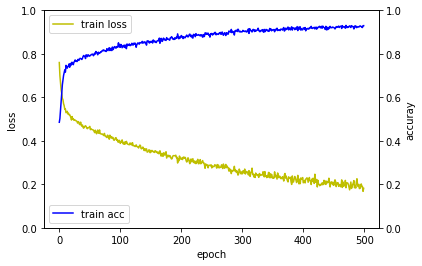

In [154]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [155]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=batch)
print('loss_and_metrics : ' + str(loss_and_metrics))

27/27 [==============================] - 0s 920us/step - loss: 1.1200 - accuracy: 0.7557
loss_and_metrics : [1.1199750900268555, 0.755667507648468]
